<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Backward_Stepwise_Selection_in_Healthcare_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Backward Stepwise Selection Process:
Removed X5 | RSS: 103.7873
Removed X15 | RSS: 104.0539
Removed X6 | RSS: 104.4041
Removed X14 | RSS: 105.3705
Removed X12 | RSS: 106.3015
Removed X9 | RSS: 108.3354
Removed X10 | RSS: 111.7863
Removed X13 | RSS: 162.6851
Removed X3 | RSS: 264.8847
Removed X8 | RSS: 386.2267
Removed X4 | RSS: 692.0246
Removed X2 | RSS: 1089.2563
Removed X11 | RSS: 1667.1878
Removed X7 | RSS: 2236.6490

Best Model Selected: Predictors: ['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15'], RSS: 103.7873


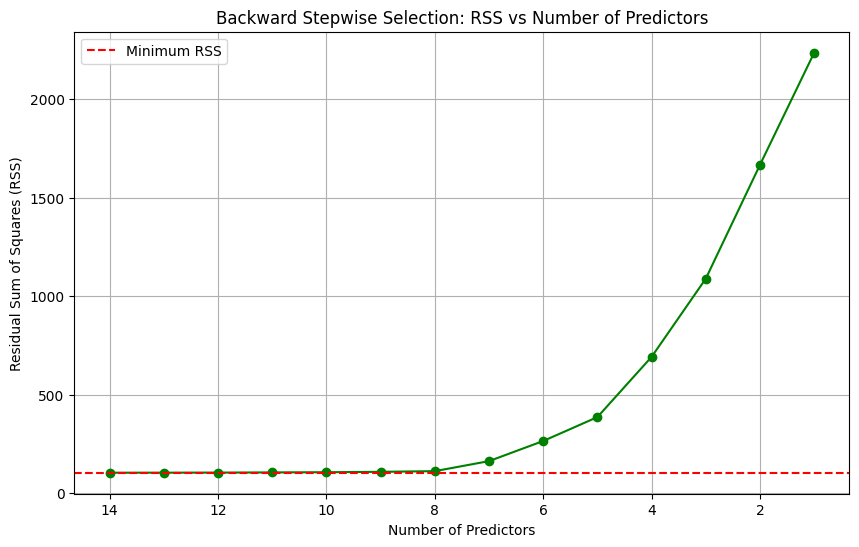


Summary of Backward Stepwise Selection:
Optimal Predictors: ['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']
Final RSS: 103.7873


In [1]:
# Step 1: Importing Libraries
# I started by importing the necessary libraries to handle data, build regression models, and calculate performance metrics.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import matplotlib.pyplot as plt

# Step 2: Generating Synthetic Healthcare Data
# I simulated healthcare data with 15 predictors representing health-related variables.
# The response variable (Y) represents an outcome such as disease risk or readmission rate.

np.random.seed(123)  # I set the seed for reproducibility
n_samples = 150      # Number of patients or cases
n_predictors = 15    # Number of health-related predictors

# Generating predictors (e.g., age, BMI, cholesterol, etc.)
X = np.random.normal(size=(n_samples, n_predictors))

# Defining true coefficients for the underlying health relationships
true_coefficients = np.array([3.5, -2.0, 0.8, 1.5, 0, 0, 2.2, -1.0, 0, 0, 1.8, 0, -0.7, 0, 0])

# Simulating the outcome variable (e.g., patient readmission rate) with noise
Y = np.dot(X, true_coefficients) + np.random.normal(scale=1.0, size=n_samples)

# Converting data into a DataFrame to facilitate analysis
columns = [f"X{i+1}" for i in range(n_predictors)]
data = pd.DataFrame(X, columns=columns)
data['Y'] = Y

# Step 3: Backward Stepwise Selection Function
# I implemented the backward stepwise selection method to iteratively remove the least significant predictors.

def backward_stepwise_selection(data, response):
    """Performs backward stepwise selection on the given dataset."""
    predictors = list(data.columns)
    predictors.remove(response)
    selected_predictors = predictors.copy()
    best_models = []

    print("\nBackward Stepwise Selection Process:")
    while len(selected_predictors) > 1:
        scores = []
        for predictor in selected_predictors:
            # I evaluated the model performance after removing one predictor
            current_predictors = [p for p in selected_predictors if p != predictor]
            X_subset = data[current_predictors]
            model = LinearRegression().fit(X_subset, data[response])
            y_pred = model.predict(X_subset)
            rss = mean_squared_error(data[response], y_pred) * len(y_pred)
            scores.append((predictor, rss))

        # I removed the predictor with the smallest impact on RSS
        worst_predictor, best_rss = min(scores, key=lambda x: x[1])
        selected_predictors.remove(worst_predictor)
        best_models.append((list(selected_predictors), best_rss))

        print(f"Removed {worst_predictor} | RSS: {best_rss:.4f}")

    return best_models

# Step 4: Running Backward Stepwise Selection
# I applied the backward stepwise selection function to my synthetic healthcare data.
backward_models = backward_stepwise_selection(data, 'Y')

# I looked at the sequence of models to identify the optimal set of predictors.
optimal_model = min(backward_models, key=lambda x: x[1])
print(f"\nBest Model Selected: Predictors: {optimal_model[0]}, RSS: {optimal_model[1]:.4f}")

# Step 5: Visualizing Backward Stepwise Selection Results
# I extracted the number of predictors and the RSS values at each step for visualization.
num_predictors = [len(model[0]) for model in backward_models]
rss_values = [model[1] for model in backward_models]

# Plotting RSS vs. Number of Predictors
plt.figure(figsize=(10, 6))
plt.plot(num_predictors, rss_values, marker='o', color='green', linestyle='-')
plt.gca().invert_xaxis()  # I inverted the x-axis because predictors decrease over time
plt.xlabel("Number of Predictors")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.title("Backward Stepwise Selection: RSS vs Number of Predictors")
plt.grid(True)
plt.axhline(y=min(rss_values), color='red', linestyle='--', label="Minimum RSS")
plt.legend()
plt.show()

# Step 6: Reflection on Results
# I reviewed the results to ensure interpretability and performance:
print("\nSummary of Backward Stepwise Selection:")
print(f"Optimal Predictors: {optimal_model[0]}")
print(f"Final RSS: {optimal_model[1]:.4f}")
